# Redes Neuronales


# Introducción

## Contexto del Proyecto

En este informe, presentamos el desarrollo y la evaluación de un modelo de clasificación utilizando redes neuronales para predecir el resultado del tratamiento médico en casos de enfermedades en caballos. El objetivo principal es explorar la capacidad predictiva de un modelo de aprendizaje profundo en un conjunto de datos clínico relacionado con la salud equina.

## Dataset de Caballos

El conjunto de datos utilizado en este proyecto se compone de registros médicos de caballos con enfermedades, donde cada instancia describe varias características clínicas y el resultado del tratamiento correspondiente.

## Objetivo del Proyecto

El objetivo principal de este proyecto es construir un modelo predictivo que pueda clasificar con precisión si un caballo sobrevivirá o no en función de las características clínicas observadas. Esto puede tener aplicaciones significativas en la práctica veterinaria, ayudando a los profesionales a tomar decisiones informadas sobre el tratamiento de enfermedades equinas y anticipar posibles resultados adversos.

A lo largo de este informe, detallaremos el proceso de construcción del modelo, que incluye el preprocesamiento de datos, la selección de características, la construcción de la red neuronal, su entrenamiento y evaluación, así como también reflexionaremos sobre los resultados y discutiremos posibles áreas de mejora.


In [ ]:
# Para manejo de datos
import pandas as pd
import numpy as np

# Para preprocesamiento de datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Para construir y entrenar la red neuronal
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer

# Para evaluar el modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Opcionales para visualización y análisis adicional
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')



## Carga y Exploración Inicial de Datos

Antes de empezar con cualquier análisis, primero necesitamos cargar los datos y obtener una comprensión básica de su estructura y contenido. Esto incluye revisar las primeras y últimas filas, entender el tipo y la forma de los datos, e identificar cualquier signo obvio de datos faltantes o atípicos.


In [ ]:
# Carga el archivo CSV
df = pd.read_csv('horse.csv')

## 1. Vista preliminar y tratado de datos


In [ ]:
# Muestra las primeras filas para verificar que se cargó correctamente
df.head()




,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [ ]:
# y las ultimas

df.tail()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
294,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,...,55.0,65.0,NaN,NaN,euthanized,no,3205,0,0,no
295,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,...,44.0,NaN,serosanguious,3.3,euthanized,yes,2208,0,0,yes
296,yes,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,...,60.0,6.8,NaN,NaN,died,yes,3205,0,0,no
297,yes,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,...,50.0,6.0,serosanguious,3.4,lived,yes,2208,0,0,yes
298,yes,adult,534618,37.2,40.0,20.0,NaN,NaN,NaN,NaN,...,36.0,62.0,clear,1.0,euthanized,no,6112,0,0,no


In [ ]:
# Obtener las dimensiones del DataFrame
dimensiones = df.shape


print(f"El dataset de caballos tiene {dimensiones[0]} filas y {dimensiones[1]} columnas.")

El dataset de caballos tiene 299 filas y 28 columnas.


In [ ]:
# Mostrar columnas
df.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data'],
      dtype='object')

### Visualización de Datos Faltantes
Una parte importante del análisis exploratorio de datos (EDA) es visualizar la presencia de valores faltantes en nuestro conjunto de datos. Esto nos ayudará a tomar decisiones informadas sobre cómo manejar estos valores antes de entrenar nuestro modelo.

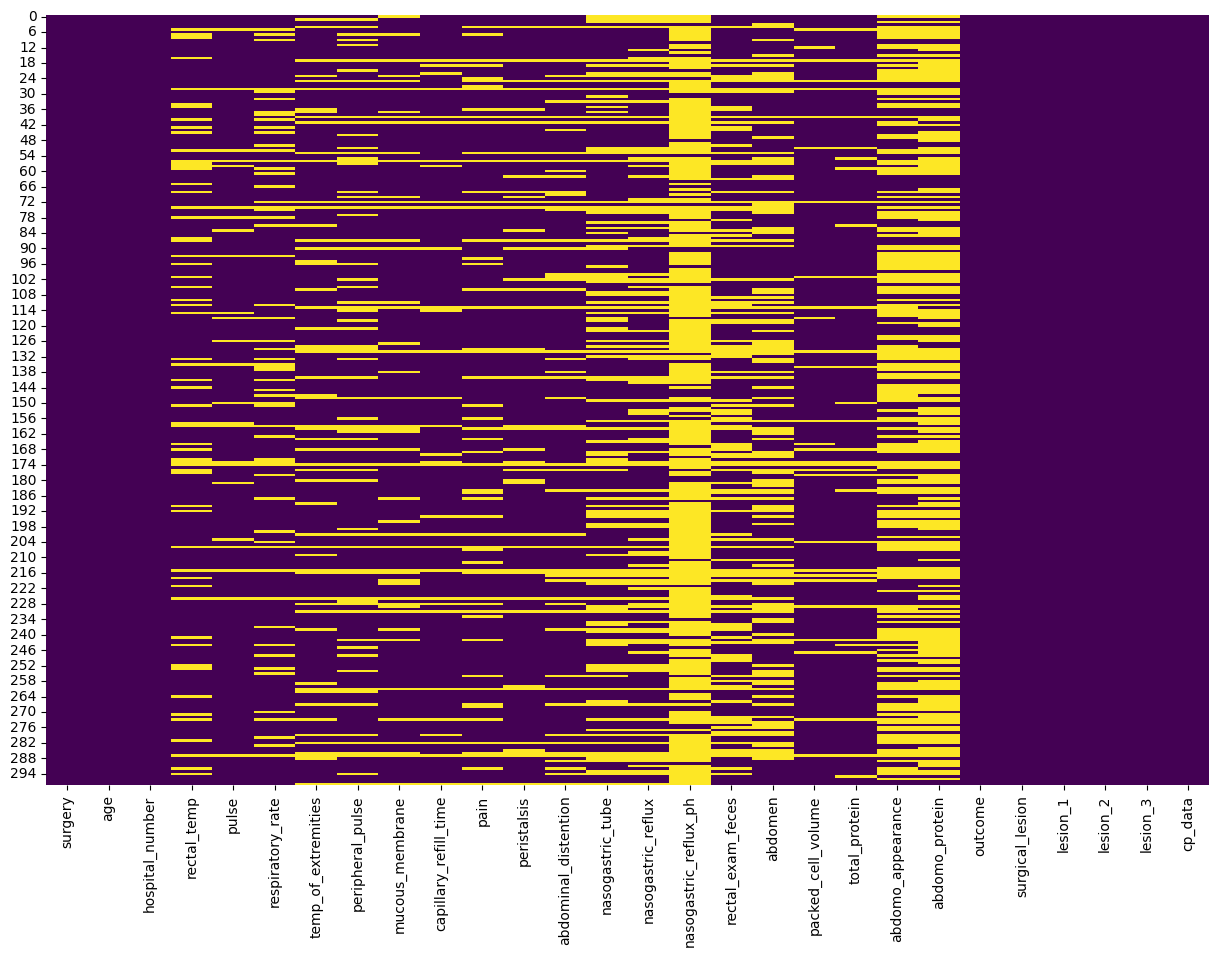

In [ ]:
# Visualización de valores faltantes
plt.figure(figsize=(15, 10))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [ ]:
# Evaluamos cuántos registros tiene valores nulos por variable
na = df.isna().sum()
na

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [ ]:
# Calculando el porcentaje de valores nulos por columna
na_percentage = (df.isna().sum() / len(df)) * 100

# Mostrando los porcentajes de valores nulos
print(na_percentage)


surgery                   0.000000
age                       0.000000
hospital_number           0.000000
rectal_temp              20.066890
pulse                     8.026756
respiratory_rate         19.397993
temp_of_extremities      18.729097
peripheral_pulse         23.076923
mucous_membrane          15.719064
capillary_refill_time    10.702341
pain                     18.394649
peristalsis              14.715719
abdominal_distention     18.729097
nasogastric_tube         34.782609
nasogastric_reflux       35.451505
nasogastric_reflux_ph    82.274247
rectal_exam_feces        34.113712
abdomen                  39.464883
packed_cell_volume        9.698997
total_protein            11.036789
abdomo_appearance        55.183946
abdomo_protein           66.220736
outcome                   0.000000
surgical_lesion           0.000000
lesion_1                  0.000000
lesion_2                  0.000000
lesion_3                  0.000000
cp_data                   0.000000
dtype: float64


In [ ]:
df['outcome'].unique()

array(['died', 'euthanized', 'lived'], dtype=object)

### Limpieza y Preprocesamiento de Datos
El siguiente paso es limpiar y preparar los datos para el modelado. Esto implica eliminar características con una alta proporción de valores faltantes, que pueden afectar negativamente el rendimiento del modelo, así como decidir cómo imputar los valores faltantes en otras características.

In [ ]:
# Lista de columnas con más del 30% de valores faltantes
columns_to_drop = na_percentage[na_percentage > 30].index.tolist()

# Agregando 'hospital_number' a la lista de columnas a eliminar
columns_to_drop.append('hospital_number')

# Eliminando las columnas seleccionadas del DataFrame
df_cleaned = df.drop(columns=columns_to_drop)

print(f"Columnas eliminadas: {columns_to_drop}")
print(f"Dimensiones del DataFrame después de eliminar columnas: {df_cleaned.shape}")


Columnas eliminadas: ['nasogastric_tube', 'nasogastric_reflux', 'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'abdomo_protein', 'hospital_number']
Dimensiones del DataFrame después de eliminar columnas: (299, 20)


In [ ]:
# Lista de columnas que queremos conservar
columns_to_keep = [
    'surgery', 'age', 'pulse', 'respiratory_rate',
    'temp_of_extremities', 'mucous_membrane', 'capillary_refill_time',
    'pain', 'peristalsis', 'abdominal_distention', 'packed_cell_volume',
    'total_protein', 'outcome'
]

# Manteniendo solo las columnas seleccionadas en el DataFrame
df_final = df_cleaned[columns_to_keep]

# Mostrando las primeras filas del DataFrame final para verificar
print(df_final.head())


  surgery    age  pulse  respiratory_rate temp_of_extremities mucous_membrane  \
0      no  adult   66.0              28.0                cool             NaN   
1     yes  adult   88.0              20.0                 NaN   pale_cyanotic   
2      no  adult   40.0              24.0              normal       pale_pink   
3     yes  young  164.0              84.0                cold   dark_cyanotic   
4      no  adult  104.0              35.0                 NaN   dark_cyanotic   

  capillary_refill_time          pain peristalsis abdominal_distention  \
0            more_3_sec  extreme_pain      absent               severe   
1            less_3_sec     mild_pain      absent               slight   
2            less_3_sec     mild_pain  hypomotile                 none   
3            more_3_sec     depressed      absent               severe   
4            more_3_sec           NaN         NaN                  NaN   

   packed_cell_volume  total_protein     outcome  
0                

In [ ]:
# Calculando el porcentaje de valores nulos por columna en el DataFrame limpio
na_percentage_cleaned = (df_final.isna().sum() / len(df_final)) * 100

# Mostrando los porcentajes de valores nulos
print(na_percentage_cleaned)

surgery                   0.000000
age                       0.000000
pulse                     8.026756
respiratory_rate         19.397993
temp_of_extremities      18.729097
mucous_membrane          15.719064
capillary_refill_time    10.702341
pain                     18.394649
peristalsis              14.715719
abdominal_distention     18.729097
packed_cell_volume        9.698997
total_protein            11.036789
outcome                   0.000000
dtype: float64


In [ ]:
from sklearn.impute import SimpleImputer

# Imputador para variables numéricas
imputer_num = SimpleImputer(strategy='median')
num_columns = ['pulse', 'respiratory_rate', 'packed_cell_volume', 'total_protein']

# Realizando la imputación y asignando los valores imputados
df_final.loc[:, num_columns] = imputer_num.fit_transform(df_final[num_columns])

# Repitiendo el proceso para las variables categóricas
imputer_cat = SimpleImputer(strategy='most_frequent')
cat_columns = ['temp_of_extremities', 'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention']

df_final.loc[:, cat_columns] = imputer_cat.fit_transform(df_final[cat_columns])



In [ ]:
# Calculando el porcentaje de valores nulos por columna en el DataFrame limpio
na_percentage_cleaned = (df_final.isna().sum() / len(df_final)) * 100

# Mostrando los porcentajes de valores nulos
print(na_percentage_cleaned)

surgery                  0.0
age                      0.0
pulse                    0.0
respiratory_rate         0.0
temp_of_extremities      0.0
mucous_membrane          0.0
capillary_refill_time    0.0
pain                     0.0
peristalsis              0.0
abdominal_distention     0.0
packed_cell_volume       0.0
total_protein            0.0
outcome                  0.0
dtype: float64


In [ ]:
# Calculando el número total de valores nulos en el DataFrame limpio
total_nulls = df_final.isna().sum().sum()

print(f"Total de valores nulos en el DataFrame limpio: {total_nulls}")

Total de valores nulos en el DataFrame limpio: 0


## Resumen de Preparación de Datos y Selección de Variables

### Limpieza de Datos
- **Eliminación de Variables con +30% de Valores Nulos**: Se descartaron variables como nasogastric_reflux_ph, abdomo_protein y abdomo_appearance y algunas otras, debido a la alta proporción de datos faltantes, lo que compromete la integridad del análisis.
  
### Selección de Variables
- **Variables Retenidas**: Se eligieron variables como surgery, age, pulse y respiratory_rate y algunas otras, por su relevancia clínica y potencial predictivo respecto a la supervivencia de los caballos.
  
### Estrategias de Imputación
- **Variables Numéricas**: Se utilizó la mediana para imputar valores faltantes en variables como pulse y total_protein, mitigando el impacto de los valores atípicos.
- **Variables Categóricas**: Se aplicó el valor más frecuente para variables como temp_of_extremities y mucous_membrane, preservando la distribución de las categorías.

### Justificación
- **Relevancia Clínica y Predictiva**: La selección se basó en la importancia clínica y el impacto en la supervivencia, priorizando la integridad y la aplicabilidad de los datos.
- **Balance entre Precisión y Simplicidad**: Al enfocarse en variables con datos completos y relevantes, se busca un modelo equilibrado que sea tanto preciso como interpretable.

## 2. Estadísticas Descriptivas y exploración

In [ ]:
# Resumen estadístico de las variables numéricas
print(df_final.describe())



            pulse  respiratory_rate  packed_cell_volume  total_protein
count  299.000000        299.000000          299.000000     299.000000
mean    71.357860         29.401338           46.180602      22.423077
std     27.554626         16.000822            9.923490      26.336270
min     30.000000          8.000000           23.000000       3.300000
25%     48.500000         20.000000           39.000000       6.600000
50%     64.000000         25.000000           45.000000       7.500000
75%     88.000000         34.500000           50.000000      52.000000
max    184.000000         96.000000           75.000000      89.000000


In [ ]:
# Resumen de las variables categóricas
print(df_final.describe(include=['object', 'bool']))


       surgery    age temp_of_extremities mucous_membrane  \
count      299    299                 299             299   
unique       2      2                   4               6   
top        yes  adult                cool     normal_pink   
freq       180    275                 164             126   

       capillary_refill_time       pain peristalsis abdominal_distention  \
count                    299        299         299                  299   
unique                     3          5           4                    4   
top               less_3_sec  mild_pain  hypomotile                 none   
freq                     219        122         171                  131   

       outcome  
count      299  
unique       3  
top      lived  
freq       178  


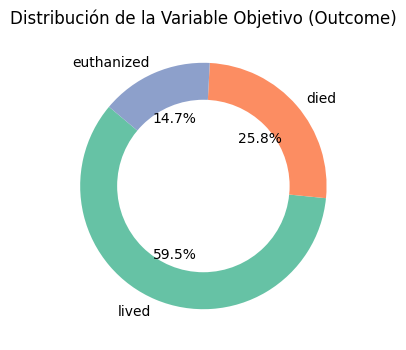

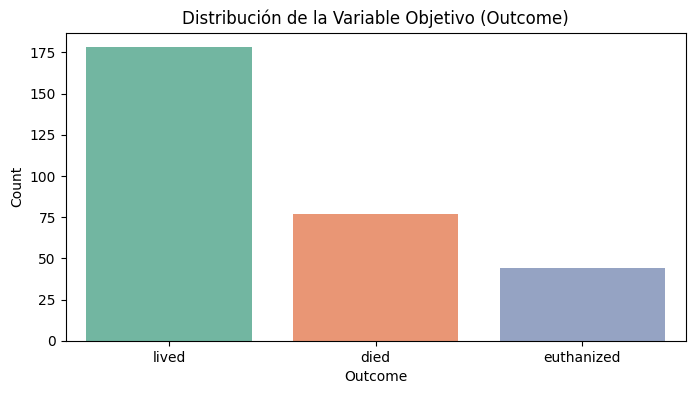

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Datos de ejemplo - reemplaza 'df_final' con tu DataFrame real
# y 'outcome' con la columna objetivo
outcome_counts = df_final['outcome'].value_counts()

# Gráfico de Donut
plt.figure(figsize=(8, 4))
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Distribución de la Variable Objetivo (Outcome)')

# Gráfico de Barras
plt.figure(figsize=(8, 4))
sns.barplot(x=outcome_counts.index, y=outcome_counts.values, palette='Set2')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Distribución de la Variable Objetivo (Outcome)')
plt.show()


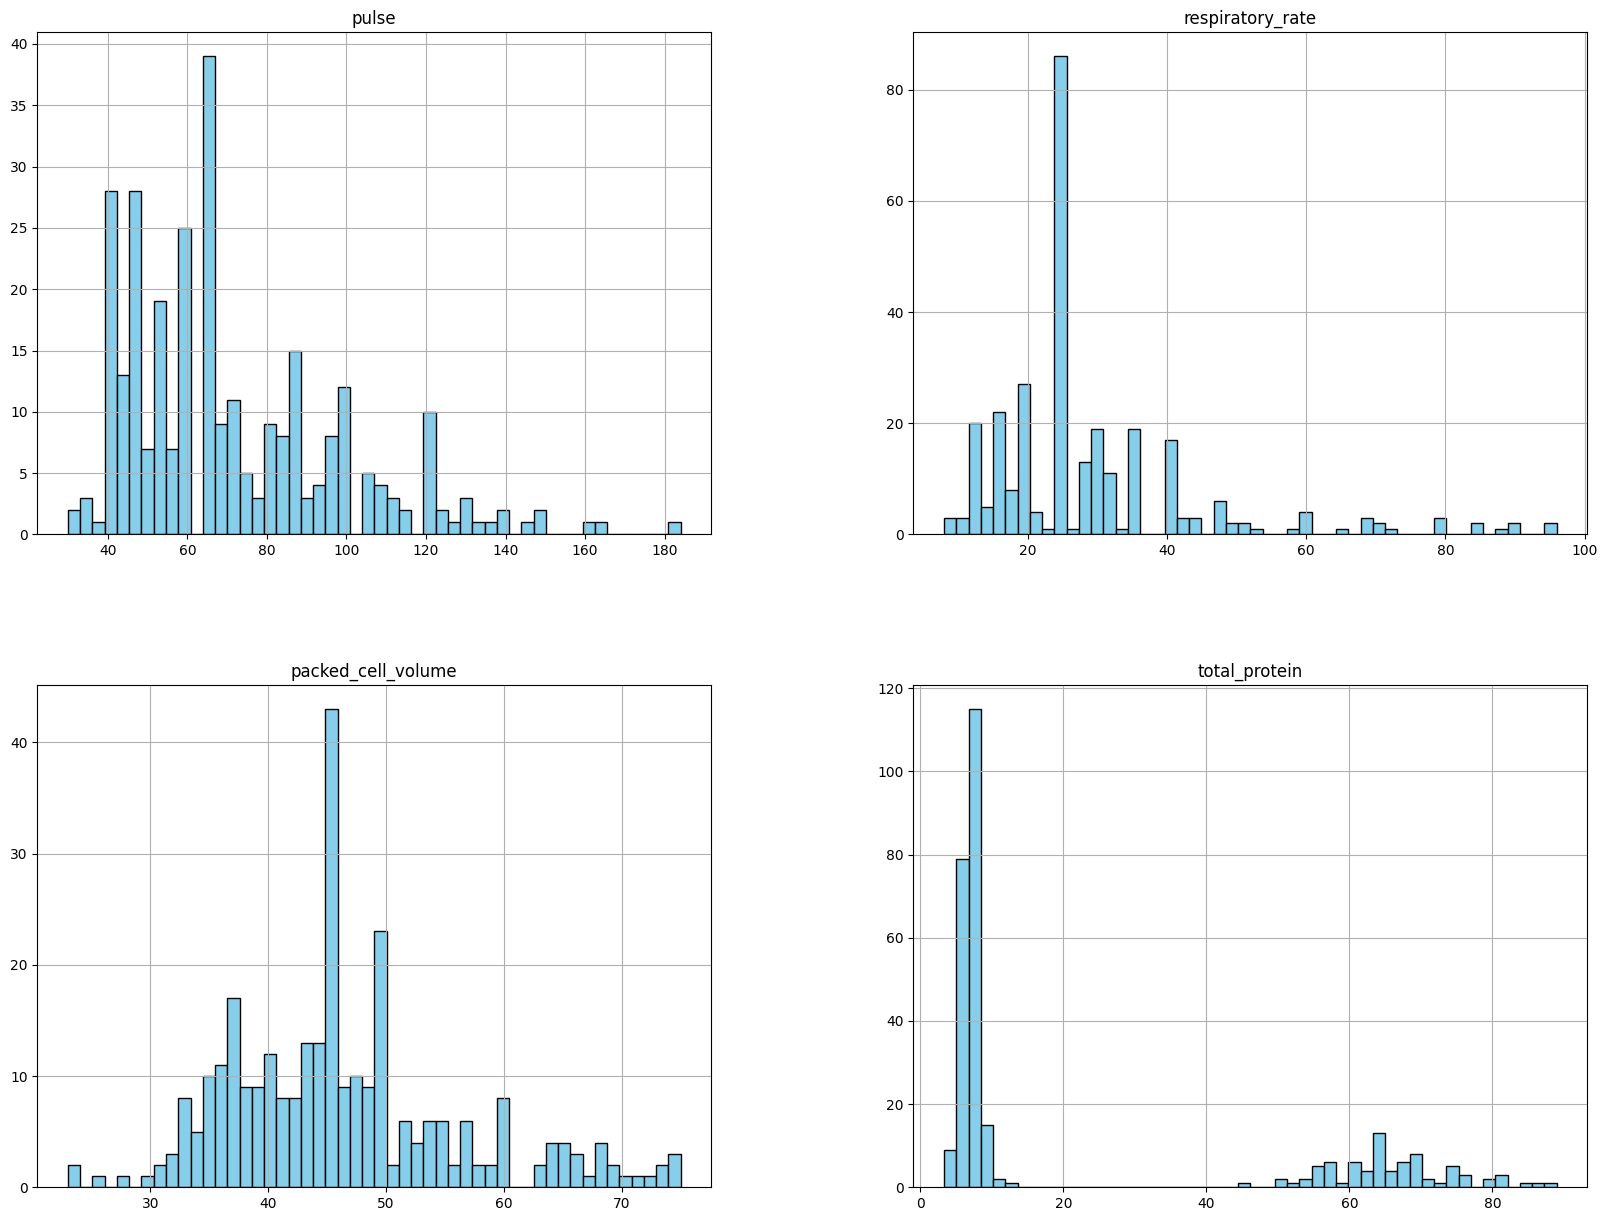

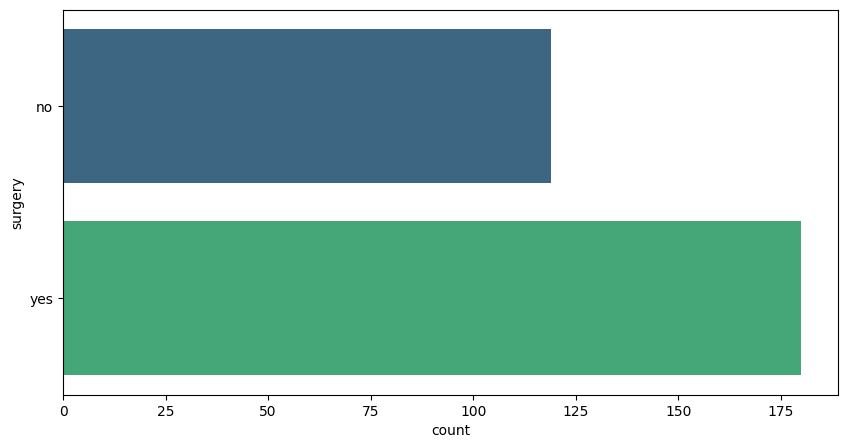

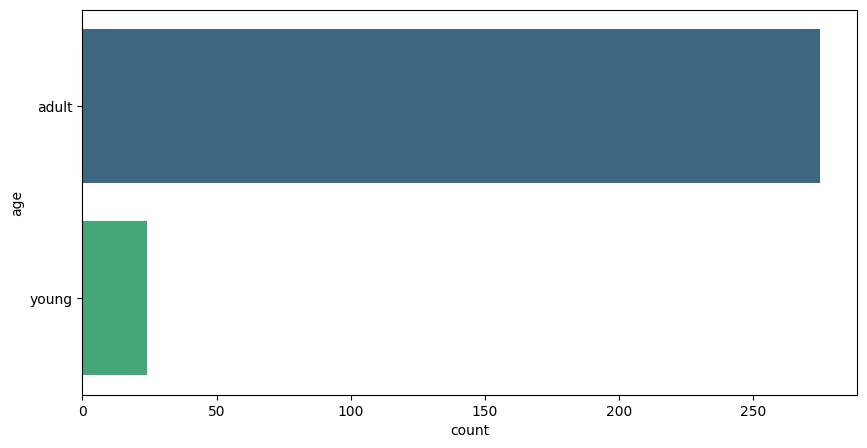

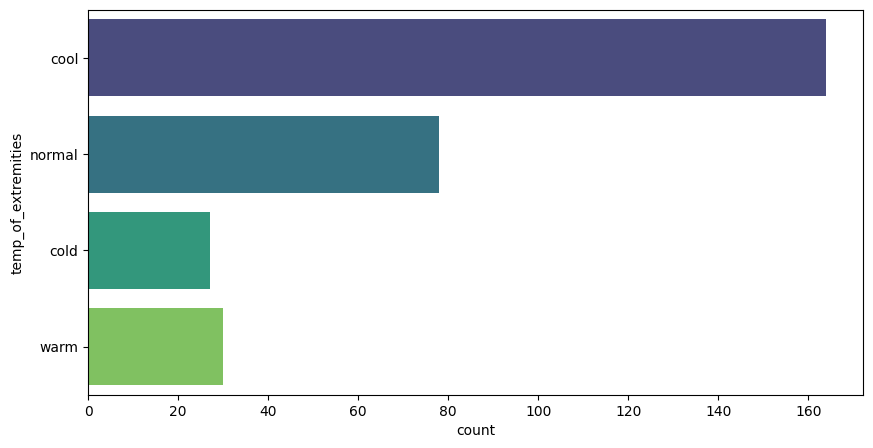

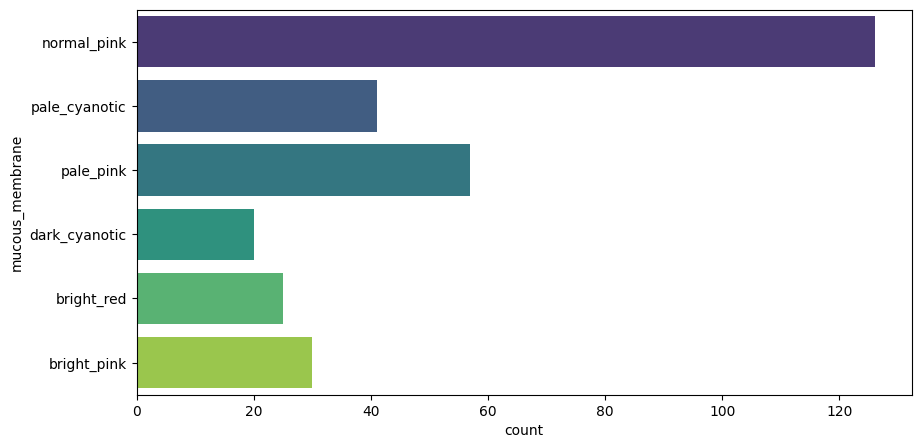

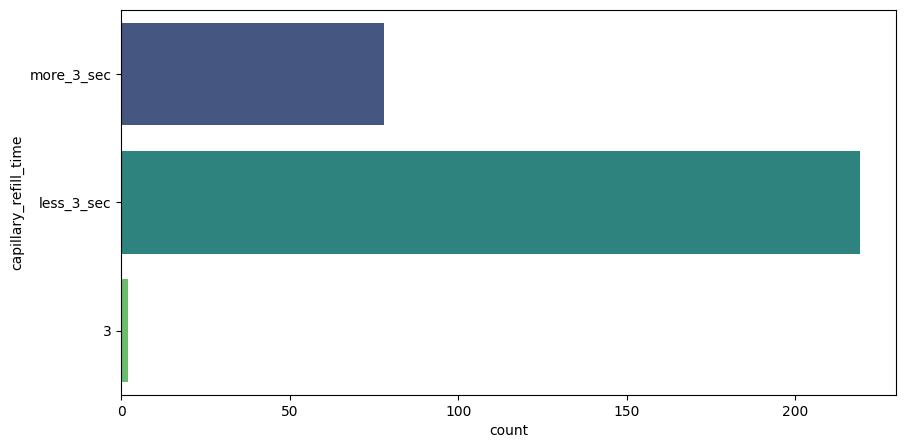

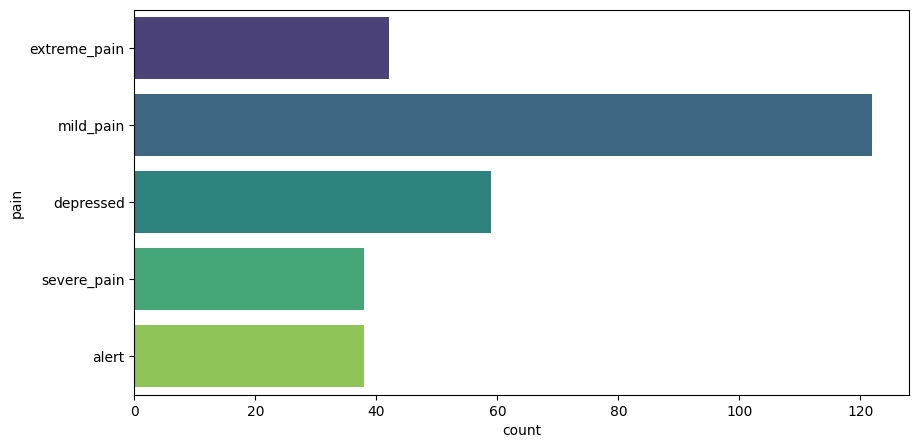

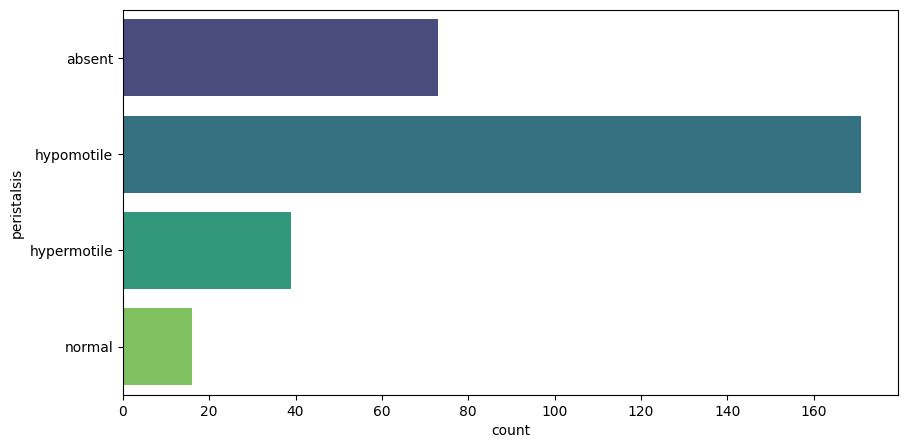

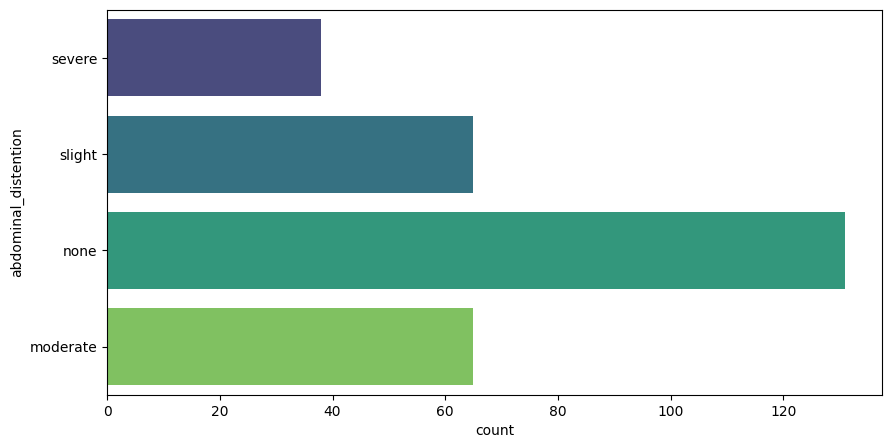

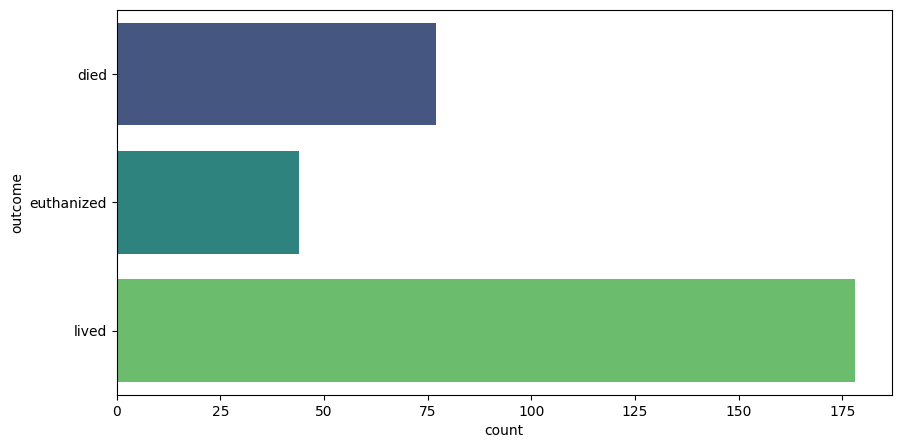

In [ ]:
# Para histogramas, puedes establecer un color base o una paleta
df_final.select_dtypes(include=[np.number]).hist(bins=50, figsize=(20, 15), color='skyblue', edgecolor='black')
plt.show()

# Para los gráficos de barras, puedes utilizar la función `palette` de Seaborn para aplicar una paleta de colores
for column in df_final.select_dtypes(include=['object', 'bool']).columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=column, data=df_final, palette='viridis')
    plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


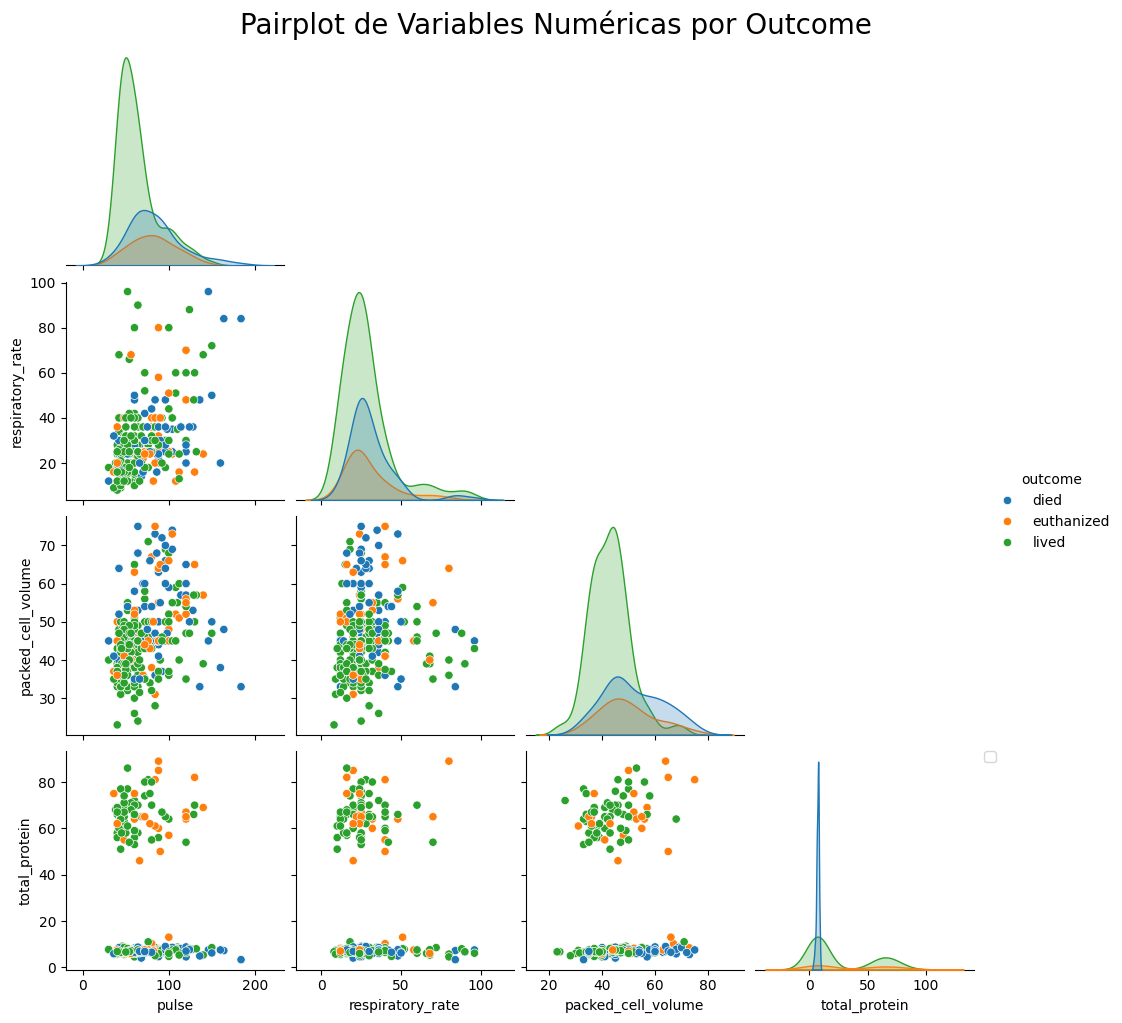

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'numeric_columns' es una lista de nombres de tus columnas numéricas
numeric_columns = ['pulse', 'respiratory_rate', 'packed_cell_volume', 'total_protein']
target = 'outcome'  # o tu variable objetivo actual

# Crear el pairplot
sns.pairplot(df_final, vars=numeric_columns, hue=target, corner=True)

# Poner la leyenda fuera del gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.suptitle('Pairplot de Variables Numéricas por Outcome', fontsize=20, y=1.02)

# Mostrar el gráfico
plt.show()


## Relación entre Total de Proteínas y Outcome

Una observación clave del pairplot es la aparente relación entre los niveles de total_protein y el outcome del caballo. Los puntos sugieren que los caballos que no sobrevivieron (died y euthanized) tienden a tener niveles distintos de proteínas totales en comparación con los que sobrevivieron (lived).


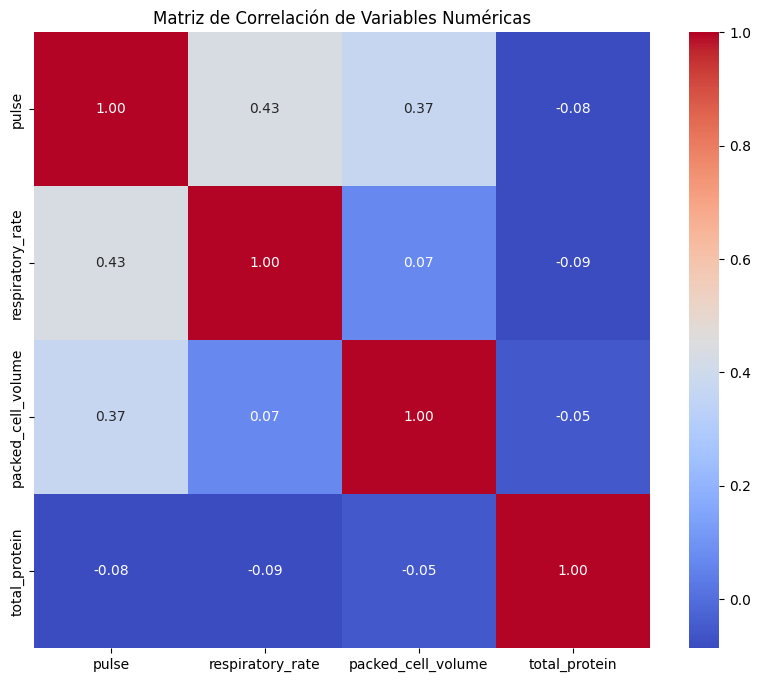

In [ ]:
# Selecciona solo columnas numéricas para la matriz de correlación
numeric_df = df_final.select_dtypes(include=[np.number])

# Ahora calcula la matriz de correlación
correlation_matrix = numeric_df.corr()

# Visualiza la matriz de correlación con Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()


### Análisis de la Matriz de Correlación

La matriz de correlación visualizada anteriormente nos ofrece información significativa sobre la relación entre las variables numéricas de nuestro conjunto de datos:

- **Pulso y Tasa Respiratoria**: Hay una correlación moderada de 0.43 entre el pulse y la respiratory_rate, lo que podría indicar que los caballos con un pulso más rápido también tienden a tener una tasa respiratoria más alta, un patrón esperado en situaciones de estrés o enfermedad.

- **Pulso y Volumen de Células Empaquetadas**: Observamos una correlación positiva más leve de 0.37 entre el pulse y el packed_cell_volume. Esta relación puede sugerir que a medida que el pulso aumenta, también lo hace el volumen de células empaquetadas, posiblemente indicando una respuesta del cuerpo a ciertas condiciones como la deshidratación o la respuesta a la pérdida de sangre.

- **Total de Proteínas**: La total_protein parece tener correlaciones muy bajas con las otras variables numéricas en nuestro conjunto de datos, lo que sugiere que los niveles de proteína total no varían directamente con cambios en el pulso, la tasa respiratoria o el volumen de células empaquetadas. Sin embargo, esta variable sigue siendo de interés para la predicción del outcome debido a su importancia clínica.



In [ ]:
df_final

,surgery,age,pulse,respiratory_rate,temp_of_extremities,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,packed_cell_volume,total_protein,outcome
0,no,adult,66.0,28.0,cool,normal_pink,more_3_sec,extreme_pain,absent,severe,45.0,8.4,died
1,yes,adult,88.0,20.0,cool,pale_cyanotic,less_3_sec,mild_pain,absent,slight,50.0,85.0,euthanized
2,no,adult,40.0,24.0,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,33.0,6.7,lived
3,yes,young,164.0,84.0,cold,dark_cyanotic,more_3_sec,depressed,absent,severe,48.0,7.2,died
4,no,adult,104.0,35.0,cool,dark_cyanotic,more_3_sec,mild_pain,hypomotile,none,74.0,7.4,died
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,120.0,70.0,cold,pale_cyanotic,more_3_sec,depressed,absent,none,55.0,65.0,euthanized
295,no,adult,72.0,24.0,cool,pale_cyanotic,more_3_sec,severe_pain,hypomotile,moderate,44.0,7.5,euthanized
296,yes,adult,72.0,30.0,cold,pale_cyanotic,less_3_sec,severe_pain,absent,moderate,60.0,6.8,died
297,yes,adult,100.0,24.0,cool,pale_pink,less_3_sec,mild_pain,hypomotile,moderate,50.0,6.0,lived


In [ ]:
# Iterar a través de las columnas categóricas e imprimir sus valores únicos
for col in df_final.select_dtypes(include=['object', 'bool']).columns:
    print(f"Valores únicos en '{col}': {df_final[col].unique()}")


Valores únicos en 'surgery': ['no' 'yes']
Valores únicos en 'age': ['adult' 'young']
Valores únicos en 'temp_of_extremities': ['cool' 'normal' 'cold' 'warm']
Valores únicos en 'mucous_membrane': ['normal_pink' 'pale_cyanotic' 'pale_pink' 'dark_cyanotic' 'bright_red'
 'bright_pink']
Valores únicos en 'capillary_refill_time': ['more_3_sec' 'less_3_sec' '3']
Valores únicos en 'pain': ['extreme_pain' 'mild_pain' 'depressed' 'severe_pain' 'alert']
Valores únicos en 'peristalsis': ['absent' 'hypomotile' 'hypermotile' 'normal']
Valores únicos en 'abdominal_distention': ['severe' 'slight' 'none' 'moderate']
Valores únicos en 'outcome': ['died' 'euthanized' 'lived']


### Selección y Transformación de Variables
Después de limpiar nuestros datos, seleccionamos las variables más relevantes para nuestro modelo y aplicamos técnicas de transformación como la codificación One-Hot para las variables categóricas. Este paso es crucial para asegurar que nuestro modelo pueda interpretar correctamente las características.

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['surgery', 'age', 'temp_of_extremities', 'mucous_membrane',
                    'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention']

# Inicializar el OneHotEncoder sin el argumento 'sparse'
one_hot_encoder = OneHotEncoder(drop='first')

# Aplicar One-Hot Encoding y convertir a matriz densa
encoded_data = one_hot_encoder.fit_transform(df_final[categorical_cols]).toarray()

# Crear un DataFrame con los datos codificados
encoded_df = pd.DataFrame(encoded_data, columns=one_hot_encoder.get_feature_names_out(categorical_cols))

# Resetear el índice de df_final para asegurar una concatenación correcta
df_final.reset_index(drop=True, inplace=True)

# Concatenar el DataFrame original con el DataFrame de variables codificadas
df_final_encoded = pd.concat([df_final.drop(categorical_cols, axis=1), encoded_df], axis=1)

# Mostrar las primeras filas del DataFrame resultante
print(df_final_encoded.head())


   pulse  respiratory_rate  packed_cell_volume  total_protein     outcome  \
0   66.0              28.0                45.0            8.4        died   
1   88.0              20.0                50.0           85.0  euthanized   
2   40.0              24.0                33.0            6.7       lived   
3  164.0              84.0                48.0            7.2        died   
4  104.0              35.0                74.0            7.4        died   

   surgery_yes  age_young  temp_of_extremities_cool  \
0          0.0        0.0                       1.0   
1          1.0        0.0                       1.0   
2          0.0        0.0                       0.0   
3          1.0        1.0                       0.0   
4          0.0        0.0                       1.0   

   temp_of_extremities_normal  temp_of_extremities_warm  ...  pain_depressed  \
0                         0.0                       0.0  ...             0.0   
1                         0.0                 

In [ ]:
df_final_encoded

,pulse,respiratory_rate,packed_cell_volume,total_protein,outcome,surgery_yes,age_young,temp_of_extremities_cool,temp_of_extremities_normal,temp_of_extremities_warm,...,pain_depressed,pain_extreme_pain,pain_mild_pain,pain_severe_pain,peristalsis_hypermotile,peristalsis_hypomotile,peristalsis_normal,abdominal_distention_none,abdominal_distention_severe,abdominal_distention_slight
0,66.0,28.0,45.0,8.4,died,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,88.0,20.0,50.0,85.0,euthanized,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,40.0,24.0,33.0,6.7,lived,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,164.0,84.0,48.0,7.2,died,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,104.0,35.0,74.0,7.4,died,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,120.0,70.0,55.0,65.0,euthanized,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
295,72.0,24.0,44.0,7.5,euthanized,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
296,72.0,30.0,60.0,6.8,died,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
297,100.0,24.0,50.0,6.0,lived,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping  # Paso 1: Importar EarlyStopping

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Codificar la variable objetivo 'outcome'
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df_final_encoded['outcome'])
y_one_hot = to_categorical(y_encoded)


In [ ]:
# Verificar la forma de y_one_hot
print("Forma de y_one_hot:", y_one_hot.shape)

# Verificar el tipo de y_one_hot
print("Tipo de y_one_hot:", type(y_one_hot))

# Inspeccionar los primeros registros de y_one_hot
print("Primeros registros de y_one_hot:\n", y_one_hot[:5])


Forma de y_one_hot: (299, 3)
Tipo de y_one_hot: <class 'numpy.ndarray'>
Primeros registros de y_one_hot:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]


### Construcción del Modelo de Red Neuronal
Con nuestros datos preparados, pasamos a la construcción de la red neuronal. La selección de la arquitectura se basa en el equilibrio entre la capacidad de modelado y la complejidad computacional, respetando el límite de 10,000 parámetros.

In [ ]:
# Asegurarse de que 'X' contenga solo las características, excluyendo 'outcome'
X = df_final_encoded.drop('outcome', axis=1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)


In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Configurar EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

### Entrenamiento y Evaluación del Modelo
El modelo es entrenado utilizando un conjunto de entrenamiento y evaluado con un conjunto de validación. Usamos EarlyStopping para prevenir el sobreajuste, asegurándonos de que el modelo generalice bien a datos no vistos.

In [ ]:
# Entrenar el modelo con EarlyStopping
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stopping]  # Incluir EarlyStopping en el entrenamiento
)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.2630 - loss: 6.4516 - val_accuracy: 0.5000 - val_loss: 2.1905
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5364 - loss: 2.1122 - val_accuracy: 0.4167 - val_loss: 1.5482
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4546 - loss: 1.6241 - val_accuracy: 0.6250 - val_loss: 1.1470
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5877 - loss: 1.1384 - val_accuracy: 0.6667 - val_loss: 1.0975
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6068 - loss: 1.0892 - val_accuracy: 0.6250 - val_loss: 1.0167
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6076 - loss: 0.9437 - val_accuracy: 0.6667 - val_loss: 0.9205
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6306 - loss: 0.8395 - val_accuracy: 0.5833 - val_loss: 0.9340
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6274 - loss: 0.8016 - val_accuracy: 0.6250 - val_loss: 0.8914

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7181 - loss: 0.7505 
Test Loss: 0.7200832366943359, Test Accuracy: 0.7333333492279053


El modelo alcanzó una precisión del **71.81%** durante el entrenamiento y **73.33%** en el conjunto de prueba. La pérdida fue de **0.7505** y **0.7201** respectivamente, lo que indica que el modelo tiene una buena capacidad para generalizar a nuevos datos.

- A pesar de la limitación impuesta de menos de 10.000 parámetros, el modelo demostró ser suficientemente complejo para capturar patrones significativos en los datos.

truir en el futuro.


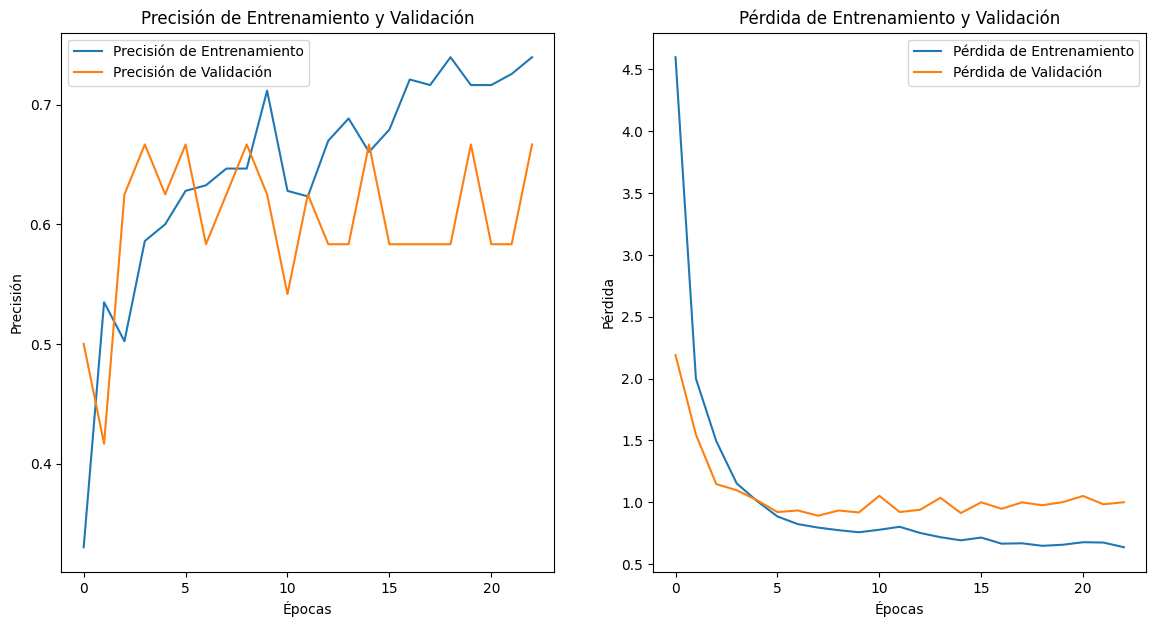

In [ ]:
import matplotlib.pyplot as plt

# Graficar la precisión de entrenamiento y validación
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer gráfico
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.title('Precisión de Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Graficar la pérdida de entrenamiento y validación
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo gráfico
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()


## Evaluación Avanzada del Modelo

Además de las métricas de precisión y pérdida, es importante considerar otras métricas que proporcionan una visión más holística del rendimiento del modelo en tareas de clasificación. A continuación, calcularemos el área bajo la curva ROC (AUC), la precisión, el recall y el puntaje F1 para nuestro modelo. La métrica AUC es particularmente útil ya que resume la capacidad del modelo para discriminar entre clases positivas y negativas en todas las tasas de falsos positivos. Un AUC más alto indica un mejor rendimiento del modelo en términos de sensibilidad y especificidad.


In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

# Para calcular el AUC ROC necesitamos las probabilidades de las clases, no las clases predichas
y_pred_probs = model.predict(X_test)

# Calculando el AUC ROC
roc_auc = roc_auc_score(y_test, y_pred_probs, multi_class="ovo", average="weighted")

# Calculando otras métricas de evaluación
accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred_probs, axis=1))
precision = precision_score(np.argmax(y_test, axis=1), np.argmax(y_pred_probs, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), np.argmax(y_pred_probs, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred_probs, axis=1), average='weighted')

# Imprimir las métricas
print(f'ROC AUC: {roc_auc:.2f}')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
ROC AUC: 0.82
Accuracy: 0.73
Precision: 0.79
Recall: 0.73
F1 Score: 0.70


In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,251 (71.30 KB)

 Trainable params: 6,083 (23.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 12,168 (47.54 KB)

In [ ]:
print(f"Total de parametros: {model.count_params()}")

Total de parametros: 6083


In [ ]:
# Predicciones en el conjunto de prueba
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_true = np.argmax(y_test, axis=1)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


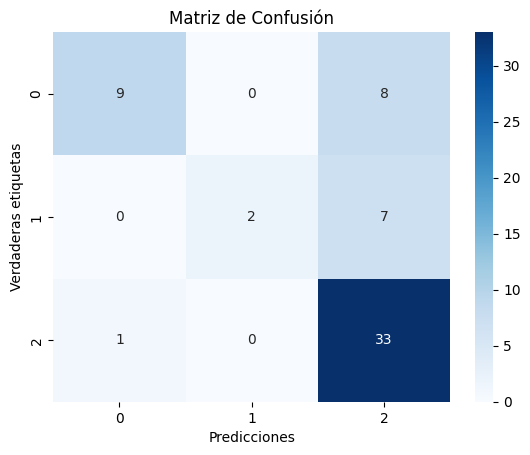

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Matriz de confusión
conf_mat = confusion_matrix(y_test_true, y_pred)

# Visualización de la matriz de confusión
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicciones')
plt.ylabel('Verdaderas etiquetas')
plt.title('Matriz de Confusión')
plt.show()


In [ ]:
# Mapeo de números a etiquetas originales
label_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}
print(label_mapping)



{0: 'died', 1: 'euthanized', 2: 'lived'}



## Conclusiones

A lo largo de este análisis, hemos realizado una serie de pasos críticos para preparar nuestros datos para la modelización con redes neuronales y entender mejor el comportamiento y la eficacia del modelo resultante. Aquí resumimos nuestros hallazgos y aprendizajes:

### Preprocesamiento y Limpieza de Datos
Comenzamos con la limpieza y preparación de nuestros datos, que incluyó la eliminación de columnas con un alto porcentaje de valores faltantes y la imputación de los valores faltantes restantes en las variables numéricas y categóricas. Ello nos permitió trabajar con un conjunto de datos más íntegro y representativo.

### Análisis Exploratorio de Datos (EDA)
El análisis exploratorio nos reveló un desequilibrio en la distribución de nuestra variable objetivo 'outcome', lo que sugiere que la mayoría de los casos en nuestro dataset resultaron en la clase 'lived'. Esto nos proporcionó un primer indicio de que nuestro modelo podría desarrollar un sesgo hacia esta clase predominante.

### Construcción y Entrenamiento de la Red Neuronal
Desarrollamos una red neuronal relativamente sencilla que se ajustaba a la restricción de tener menos de 10,000 parámetros. La red fue capaz de entrenar y aprender a partir de los datos proporcionados, aunque la evaluación del modelo mostró que la precisión en la clase mayoritaria era superior a la de las clases minoritarias.

### Evaluación del Modelo

El desempeño del modelo se analizó en base a su precisión y pérdida. Se observó que el modelo pudo generalizar bien desde el conjunto de entrenamiento al conjunto de prueba. Sin embargo, la predicción tendenciosa hacia la clase 'lived' podría reflejar un sesgo debido al desbalance de clases en el conjunto de datos. Este desbalance es un factor crítico que puede haber influido en la alta precisión del modelo, ya que 'lived' es la clase más frecuente y, por tanto, la más fácil de predecir correctamente.


### Puntos Clave y Aprendizajes
- **Desbalance de Clases**: Se identificó la necesidad de abordar el desbalance de clases para mejorar la capacidad del modelo de reconocer todas las categorías de manera equitativa.
- **Regularización y Generalización**: La inclusión de la regularización mediante EarlyStopping evitó el sobreajuste y ayudó a la generalización.
- **Importancia de la Arquitectura**: La restricción en el número de parámetros demostró que una arquitectura bien pensada puede funcionar eficazmente dentro de limitaciones estrictas.



